# Deep Learning with python
## Chapter 8 - Introduction to deep learning for computer vision
## Introduction to convenets - It's a stack of Conv2D and MaxPooling2D layers.

O termo ConvNet é uma abreviação de Convolutional Neural Network (CNN)
Uma ConvNet é um tipo de rede neural especializada no processamento de dados com estrutura de grade, como imagens. Ela aprende a extreir características visuais (como bordas, formas e padrões) a partir das imagens, sem precisar que você defina isso manualmente.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28,28,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) # 3D -> 1D
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) # Adiciona uma dimensão de canal (28, 28, 1)
train_images = train_images.astype("float32") / 255 # Converte os valores dos pixels de 0-255 para 0-1
test_images = test_images.reshape((10000, 28, 28, 1)) # Adiciona uma dimensão de canal (28, 28, 1)
test_images = test_images.astype("float32") / 255 # Converte os valores dos pixels de 0-255 para 0-1

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8804 - loss: 0.3768
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9846 - loss: 0.0474
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9906 - loss: 0.0300
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9931 - loss: 0.0225
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9946 - loss: 0.0168
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9878 - loss: 0.0418
Test accuracy: 0.991


The fundamental difference betwwen a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns-in the case of imagens, patterns found in small 2D windows of the inputs.

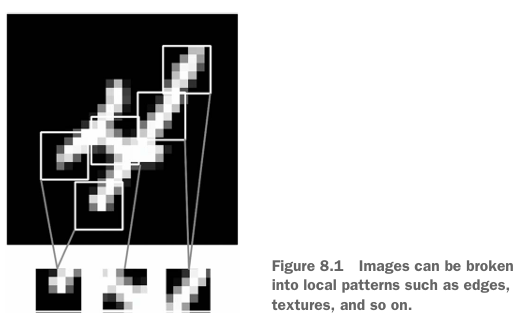

This key characteristic gives convnets two interesting properties:
- The patterns they learn are translation-invariant
- They can learn spatial hierarchies of patterns

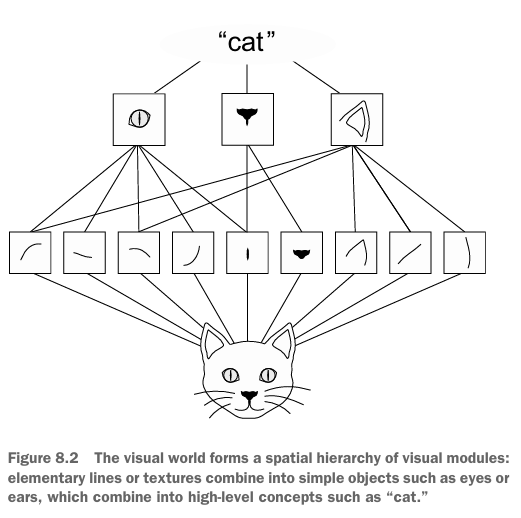

Convolutions operate over rank-3 tensors called feature maps, with two spatial axes (height and width) as well as a depth axis (also called the channels axis).

The convolution operation extracts patches from its inputs feature map and applies the same transformation to all of these patches, producing an output feature map.

In the MNIST example, the first convolution layer takes a feature map of size (28, 28, 1) and outputs a feature map of size (26, 26, 32): it computes 32 filters over its input. Each of these 32 output channels contains a 26 x 26 grid of values, which is a response map of the filter over the input, indicating the responsa of that filter pattern at different locations in the input.
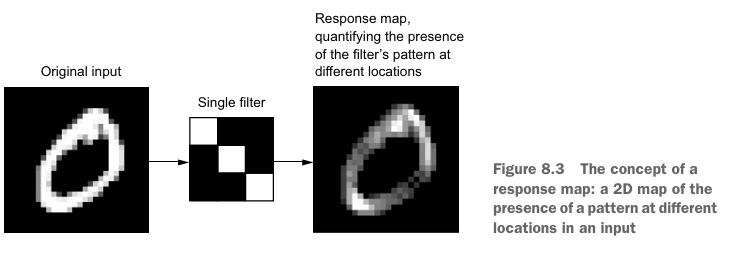

Convolutions are defined by two key parameters:
- Size of the patches extracted from the inputs: These are typically 3 X 3 pr 5 X 5. In the example, they were 3 X 3, which is a common choice;
- Depth of the output feature map: This is the number of gilters computed by the convolution. The example started with a depth of 32 and ended with a depth of 64.

Conv2D(output_depth, (window_heightm, window_width))

A convolution works by sliding these windows of size 3 X 3 or 5 X 5 over the 3D input feature map, stopping at every possible location, and extracting the 3D patch of surrounding features (shape (window_height, window_width, input_depth)). Each such 3D patch is then transformed into a 1D vector of shape (output_depth,), which is done via a tensor product with a learned weight matrixx, called the convolution kernel - the asme kernel is reused across every patch.

Filtro = kernel

Input = é a imagem de entrada | Imagem do MNIST (28, 28, 1)
Kernel = Filtro - Pequeno bloco de pesos, geralmente 3 X 3 ou 5 X 5. Ele aprende a detectar um tipo de padrão, como uma borda vertical ou um ponto central calro
